<a href="https://colab.research.google.com/github/KuriaDan/IPW13/blob/master/Copy_of_Untitled7_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Project Definition





# 2. Data Sourcing

# 3. Checking the data

In [0]:
# Clear the env
rm(list = ls())
# List of packages
install.packages("pacman")
package_list <- c("tidyverse", "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics",
                  "kableExtra", "kernlab", "xgboost")

# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
# Visualization package used in visualization of data during EDA
install.packages("DataExplorer")
library(DataExplorer)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘networkD3’



In [0]:
# Loading the data as a tibble.

shopper = read_csv('/content/online_shoppers_intention.csv') %>% as_tibble()
head(shopper)

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [0]:
# Exploring the variables
shopper %>% glimpse()


Observations: 12,330
Variables: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

> The dataset has 18 variables and 12330 observations.

# 4. Data Cleaning

In [0]:
# Checking for null values
colSums(is.na(shopper))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

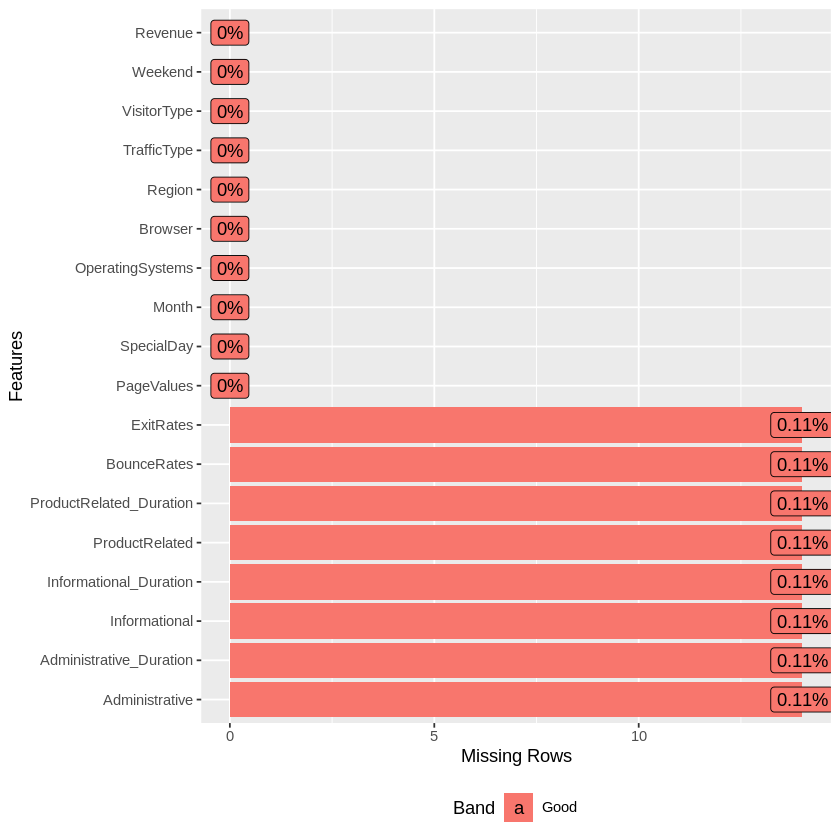

In [0]:
plot_missing(shopper)

In [0]:
# Checking for complete cases of missing values in the dataset
length(which(is.na(shopper)))
sum((complete.cases(shopper)==T))

[1] 112

[1] 12316

In [0]:
# Percentage of observations that have null values to the dataset
(12330-12316)/(12330)

[1] 0.001135442

> Since only 0.1% of observations in the dataset have null values, they can be dropped.





In [0]:
#  Dropping null values
shopper = na.omit(shopper)

In [0]:
# Checking if the data types are correct for each variable.
str(shopper)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : num  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : num  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : num  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : num  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "R

In [0]:
# Factor variables changed to their appropriate data type.
shopper$OperatingSystems=as.factor(shopper$OperatingSystems)
shopper$Browser=as.factor(shopper$Browser)
shopper$Region=as.factor(shopper$Region)
shopper$Weekend=as.factor(shopper$Weekend)
shopper$Revenue=as.factor(shopper$Revenue)
shopper$SpecialDay=as.factor(shopper$SpecialDay)
shopper$TrafficType = as.factor(shopper$TrafficType)

In [0]:
# Confirming the transformation
str(shopper)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9

In [0]:
# Summary statistics of factor variables.
shopper %>%
  select_if(is.factor) %>%
  map(~table(.)/nrow(shopper) * 100)

$SpecialDay
.
        0       0.2       0.4       0.6       0.8         1 
89.842481  1.445274  1.973043  2.849951  2.638844  1.250406 

$OperatingSystems
.
          1           2           3           4           5           6 
20.96459890 53.53199091 20.72101332  3.88113024  0.04871712  0.15427087 
          7           8 
 0.05683664  0.64144203 

$Browser
.
           1            2            3            4            5            6 
19.965898019 64.558298149  0.852549529  5.967846703  3.791815525  1.412796362 
           7            8            9           10           11           12 
 0.397856447  1.096135109  0.008119519  1.323481650  0.048717116  0.081195193 
          13 
 0.495290679 

$Region
.
        1         2         3         4         5         6         7         8 
38.762585  9.207535 19.503085  9.572913  2.573888  6.528094  6.178954  3.523871 
        9 
 4.149074 

$TrafficType
.
           1            2            3            4            5            6 
1

> The target variable, Revenue, is highly imbalanced with most of the observations containing data of online shoppers who didn't generate any revenue.

# 5. Exploratory Data Analysis

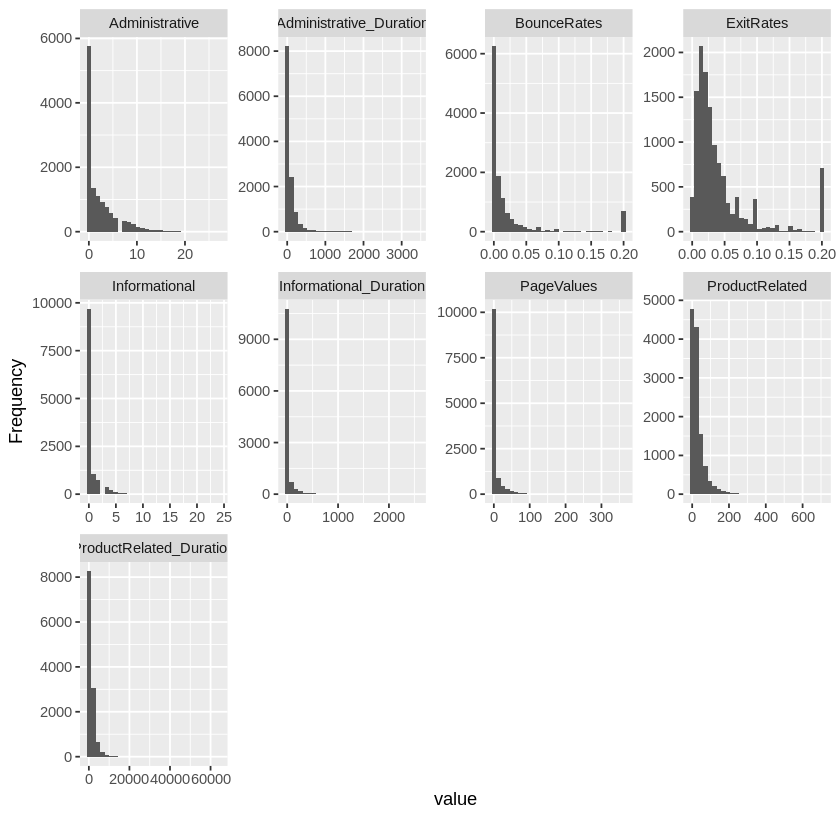

In [0]:
# Plotting the disribution of the continuous variables.
plot_histogram(shopper)

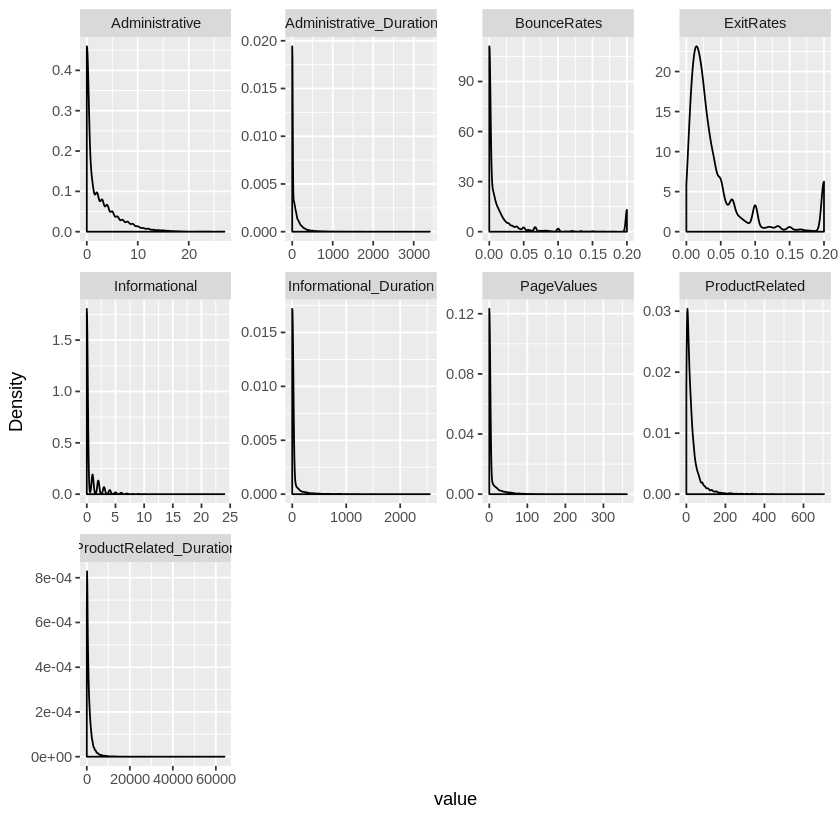

In [0]:
plot_density(shopper)

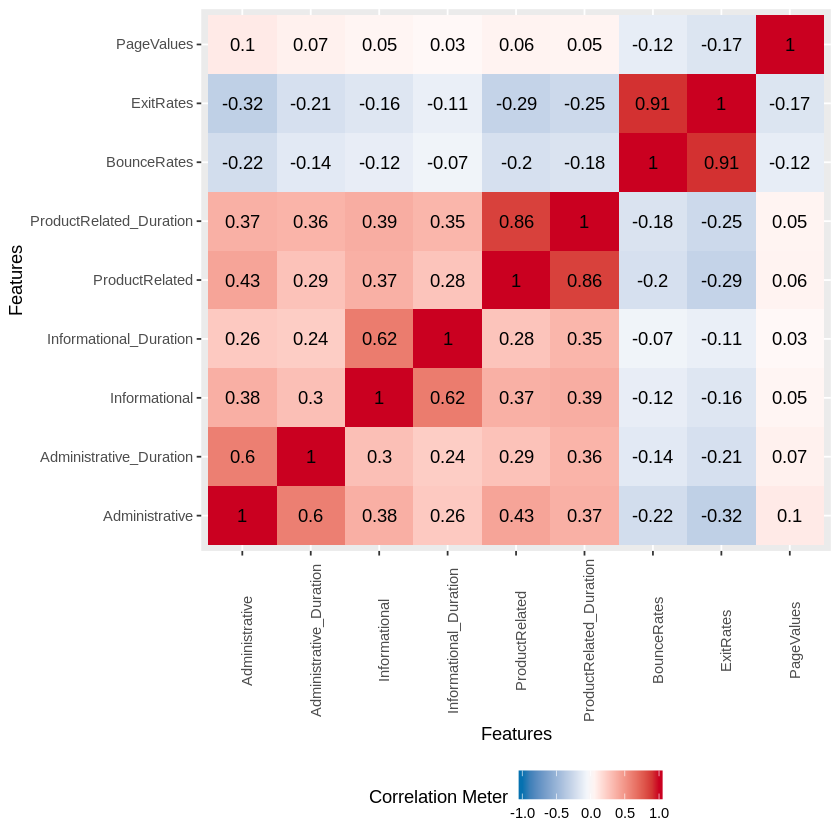

In [0]:
plot_correlation(shopper, type='continuous')

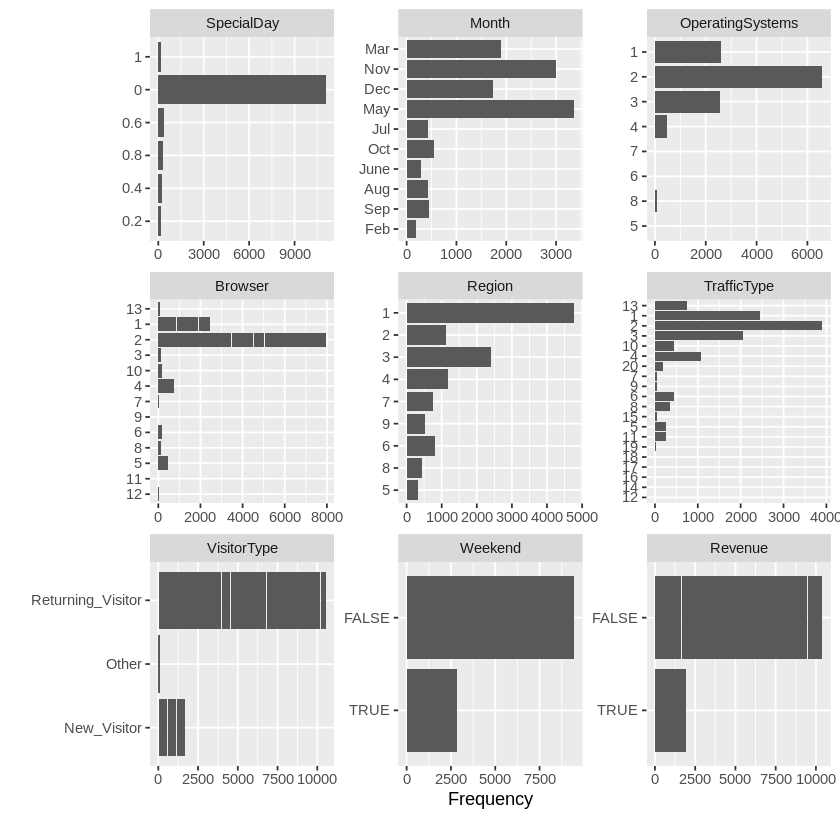

In [0]:
plot_bar(shopper)

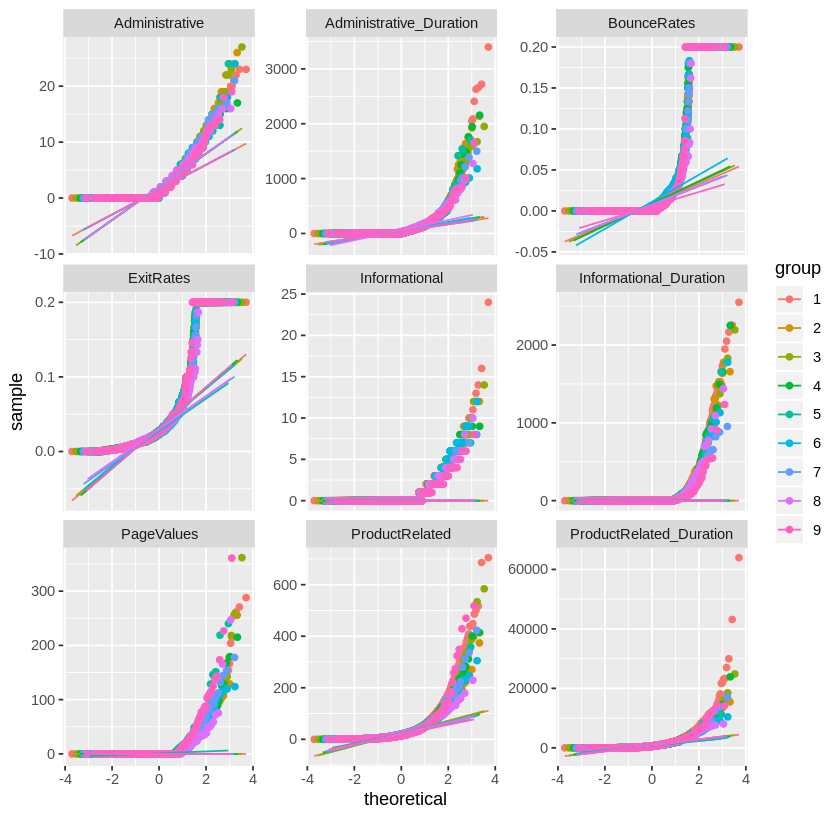

In [0]:
plot_qq(shopper, by = 'Region')

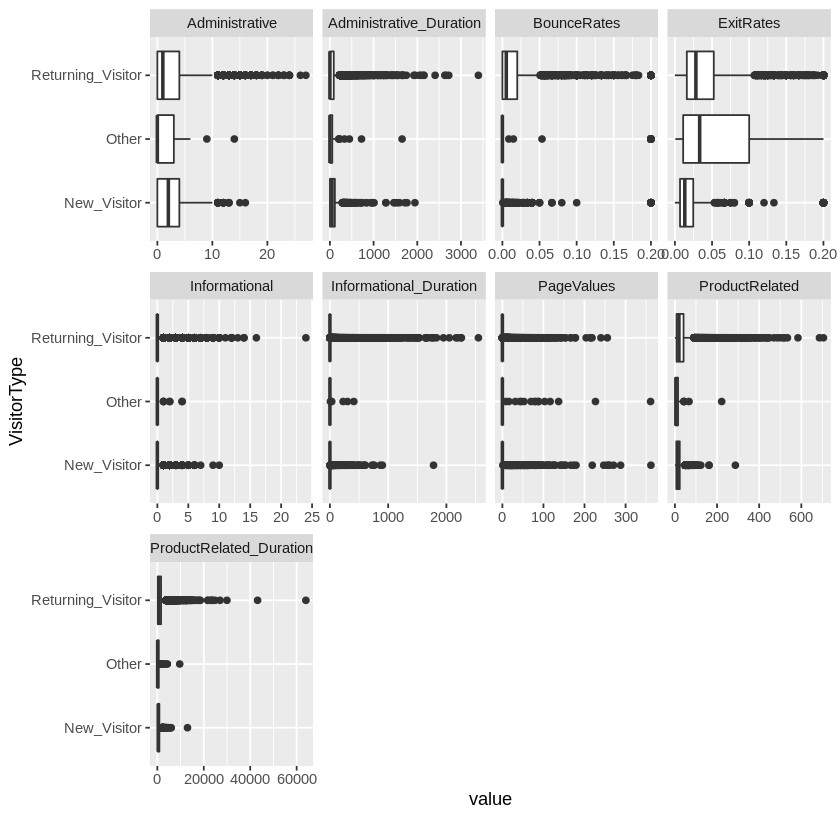

In [0]:
plot_boxplot(shopper, by='VisitorType')

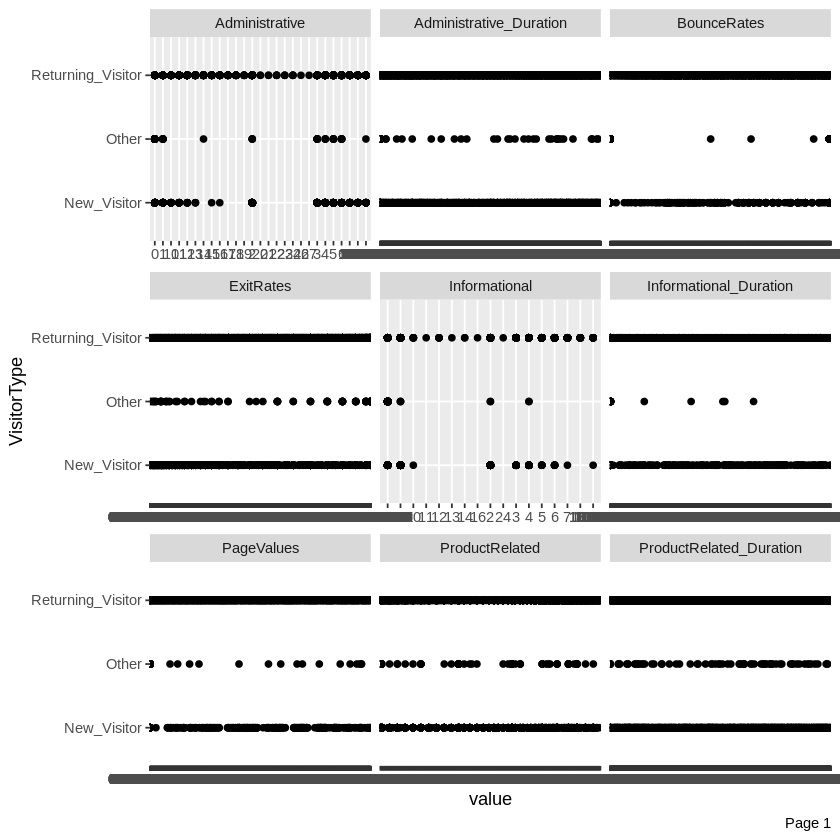

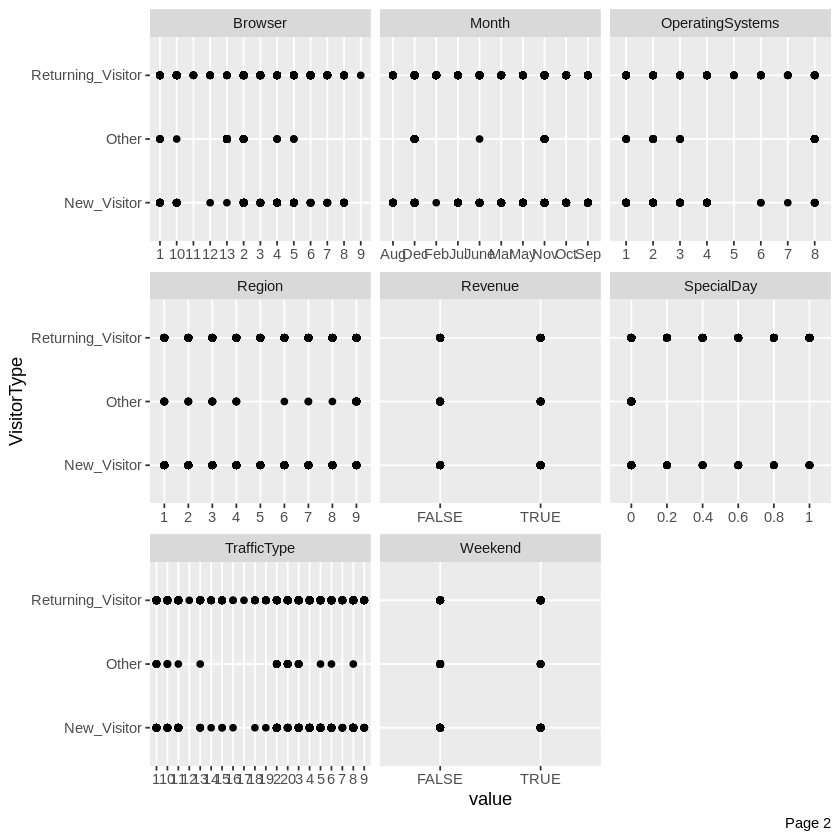

In [0]:
plot_scatterplot(shopper, by='VisitorType')

In [0]:
install.packages('ggbiplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggbiplot’ is not available (for R version 3.6.1)”

In [0]:
str(shopper)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9

In [0]:
df = shopper[1:9]

In [0]:
shopper.pca = prcomp(df, center=TRUE, scale. = TRUE)
summary(shopper.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.8405 1.2917 1.0131 1.0017 0.9695 0.64983 0.59304
Proportion of Variance 0.3764 0.1854 0.1140 0.1115 0.1044 0.04692 0.03908
Cumulative Proportion  0.3764 0.5617 0.6758 0.7873 0.8917 0.93864 0.97772
                           PC8     PC9
Standard deviation     0.35076 0.27842
Proportion of Variance 0.01367 0.00861
Cumulative Proportion  0.99139 1.00000

In [0]:
str(shopper.pca)

List of 5
 $ sdev    : num [1:9] 1.84 1.29 1.01 1 0.97 ...
 $ rotation: num [1:9, 1:9] 0.382 0.329 0.349 0.297 0.414 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:9] 2.318 80.906 0.504 34.506 31.764 ...
  ..- attr(*, "names")= chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ scale   : Named num [1:9] 3.32 176.86 1.27 140.83 44.49 ...
  ..- attr(*, "names")= chr [1:9] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ x       : num [1:12316, 1:9] -3.27 -1.43 -3.28 -2 -1.02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:9] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [0]:
library(devtools)
install_github("vqv/ggbiplot")


Loading required package: usethis


digest (0.6.21 -> 0.6.22) [CRAN]
rlang  (0.4.0  -> 0.4.1 ) [CRAN]


Installing 2 packages: digest, rlang
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmpIGJlMK/remotes7a5003edc4/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


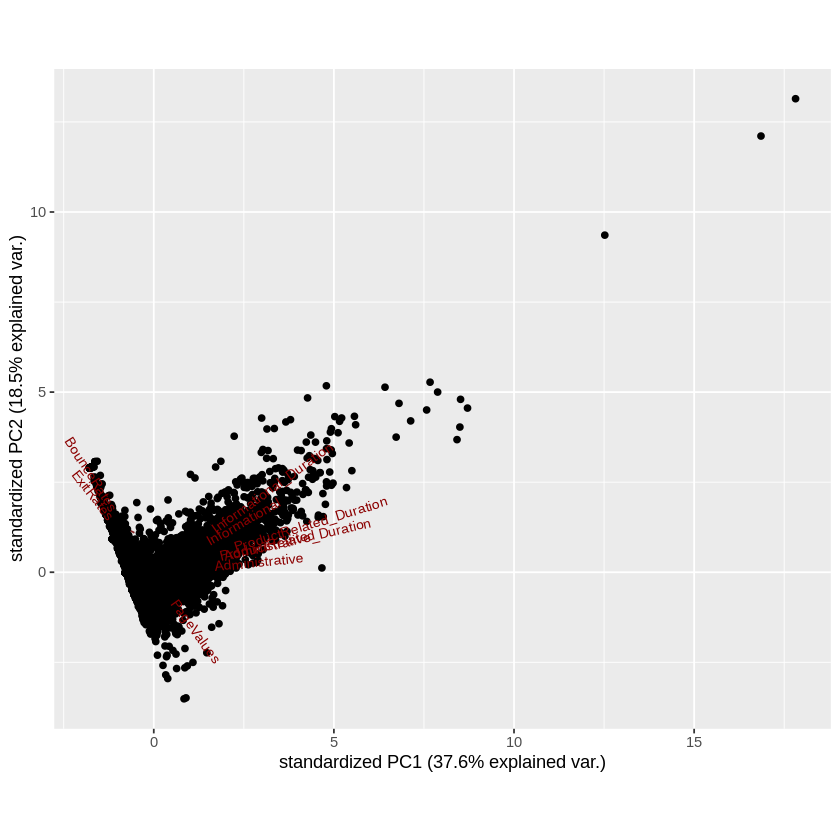

In [0]:
library(ggbiplot)
ggbiplot(shopper.pca)


In [0]:
shopper$

In [0]:
str(shopper)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	12316 obs. of  18 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9

In [0]:
# Normalizing the numerical columns to between 0 and 1
normalize = function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
shopper$Administrative = normalize(shopper$Administrative)
shopper$Administrative_Duration = normalize(shopper$Administrative_Duration)
shopper$Informational = normalize(shopper$Informational)
shopper$Informational_Duration = normalize(shopper$Informational_Duration)
shopper$ProductRelated = normalize(shopper$ProductRelated)
shopper$ProductRelated_Duration = normalize(shopper$ProductRelated_Duration)
shopper$BounceRates = normalize(shopper$BounceRates)
shopper$ExitRates = normalize(shopper$ExitRates)
shopper$PageValues = normalize(shopper$PageValues)

In [0]:
# selecting the feature without the target variable
shopper1=shopper[1:17]
# One hot encoding of the factor variables.
dmy = dummyVars(" ~ .", data = shopper1)
shopper_df = data.frame(predict(dmy, newdata = shopper1))

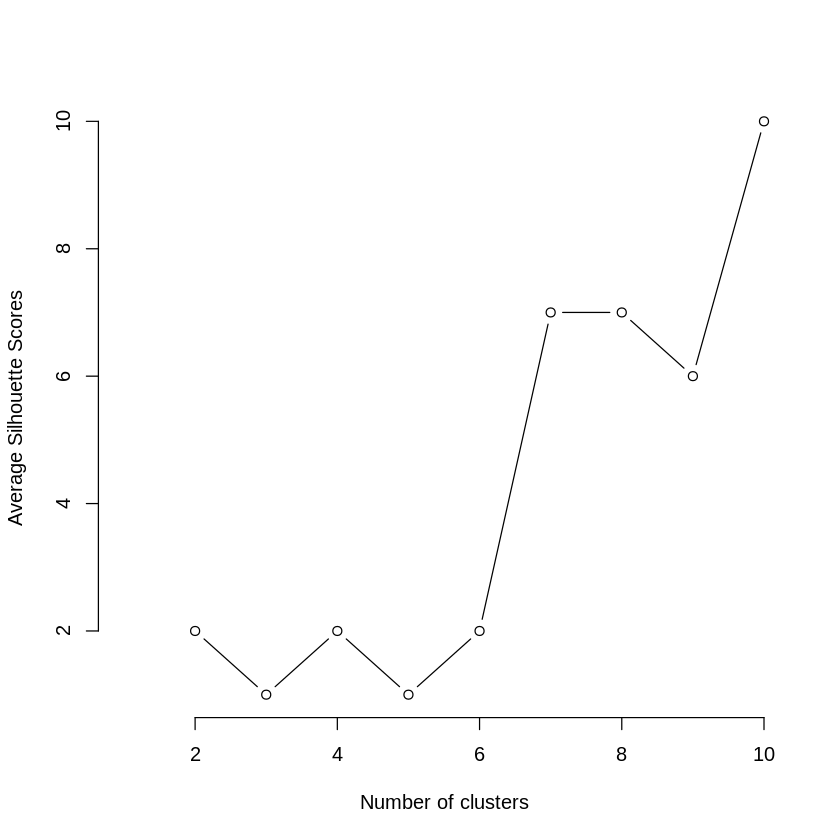

In [0]:
# Finding the optimum number of clusters in the data. The Silhouette method is used
# Clustering
#library(cluster) 
#install.packages('factoextra')
#library(factoextra)
silhouette_score <- function(k){
  km <- kmeans(shopper_df, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(shopper_df))
  mean(ss[3])
}
k <- 1:10
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

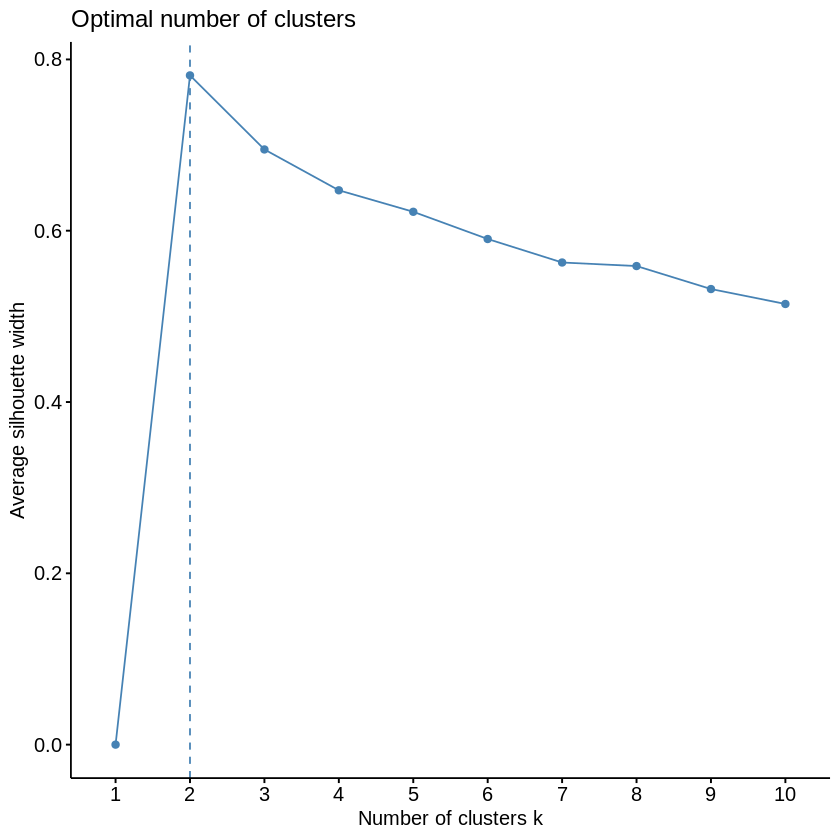

In [0]:
fviz_nbclust(shopper_df, kmeans, method='silhouette')

> The optimal number of clusters is 2.

In [0]:
# Applying kmeans to the dataset
set.seed(2019)
kmeans1 = kmeans(shopper_df, 2, iter.max = 300, nstart=10)

In [0]:
kmeans1$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay.0,⋯,TrafficType.16,TrafficType.17,TrafficType.18,TrafficType.19,TrafficType.20,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,Weekend.FALSE,Weekend.TRUE
5.624866,207.73068,1.755627,146.3098,135.47481,6093.2140,0.006524418,0.02077043,7.345740,0.9292605,⋯,0.0000000000,0.00000e+00,0.000000000,0.001071811,0.006430868,0.01822079,0.003215434,0.9785638,0.7663451,0.2336549
2.046736,70.51109,0.401388,25.3425,23.26329,794.6432,0.023433404,0.04482478,5.777121,0.8958974,⋯,0.0002635509,8.78503e-05,0.000878503,0.001405605,0.016867258,0.14732496,0.007203725,0.8454713,0.7674602,0.2325398


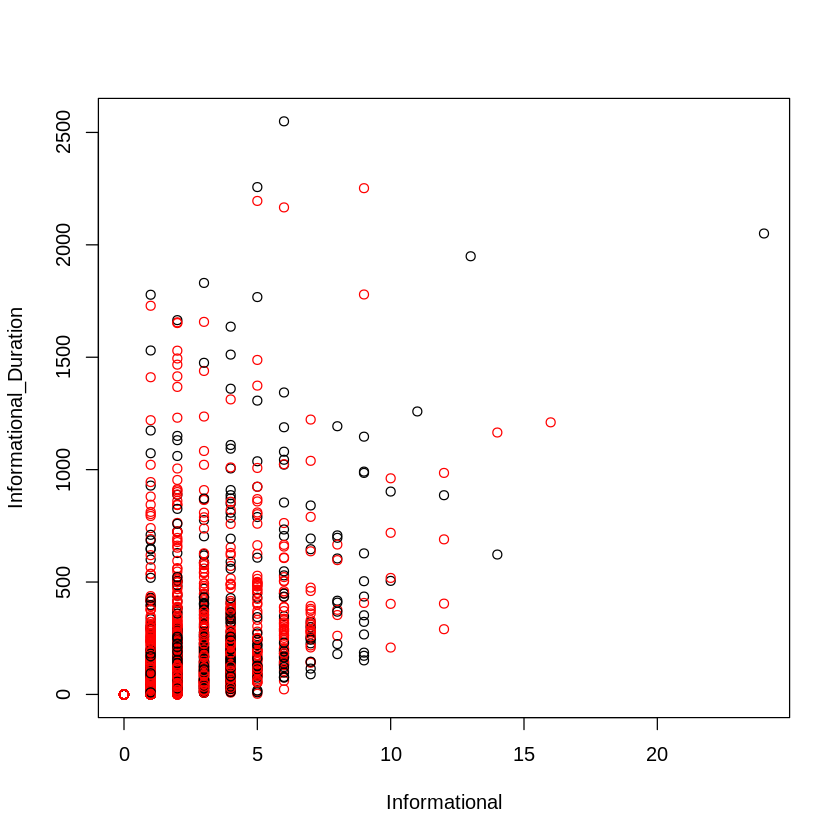

In [0]:
plot(shopper_df[, 3:4], col=kmeans1$cluster)

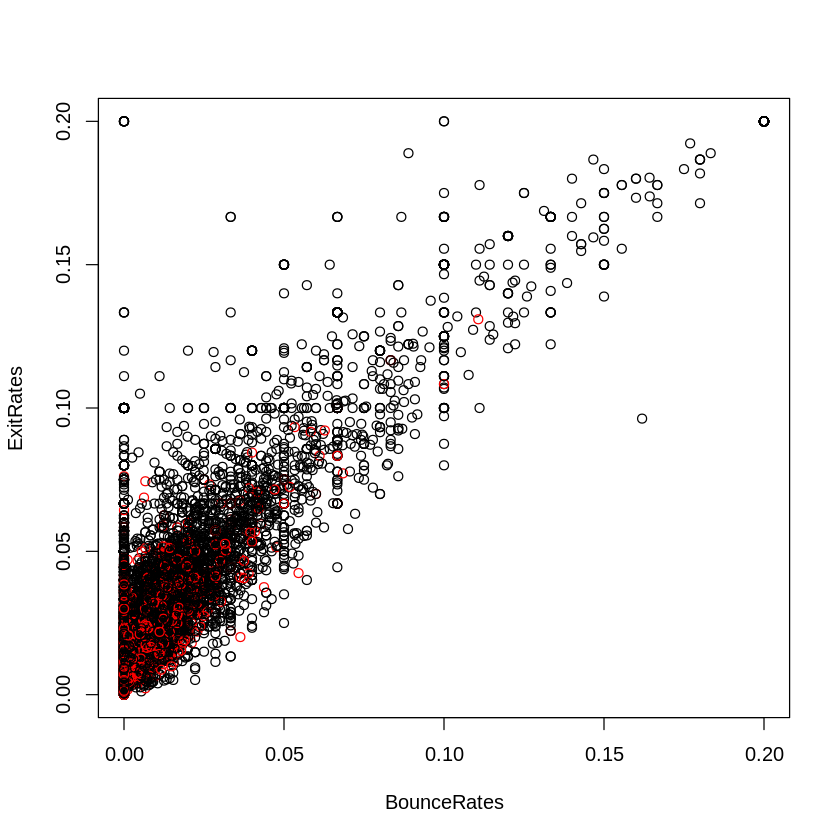

In [0]:
plot(shopper_df[, 7:8], col=shopper$Revenue)

In [0]:
table(kmeans1$cluster, shopper$Revenue)

   
    FALSE TRUE
  1   650  283
  2  9758 1625

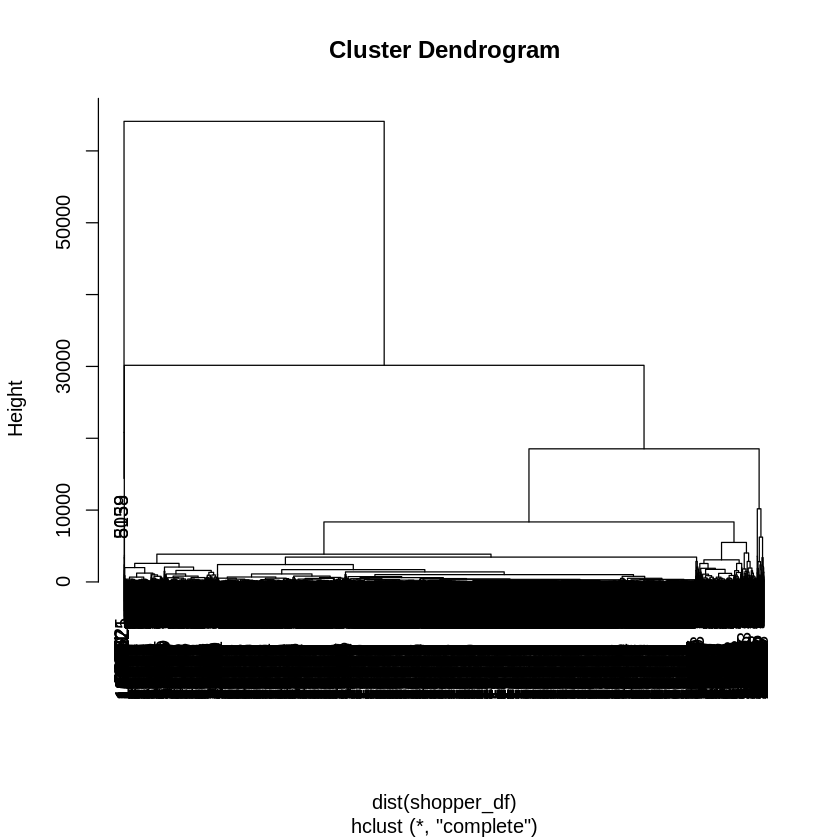

In [0]:
clusters = hclust(dist(shopper_df))
plot(clusters)

From the dendrogram, the optimum number of clusters is 2.

In [0]:
# Cutting off the tree at the desired number of clusters using cutree.
Clustercut = cutree(clusters, 2)
table(Clustercut, shopper$Revenue)

          
Clustercut FALSE  TRUE
         1 10406  1908
         2     2     0

>The algorithm correctly predicts one class but is unable to predict the important class, people who used money online, with any level of accuracy.

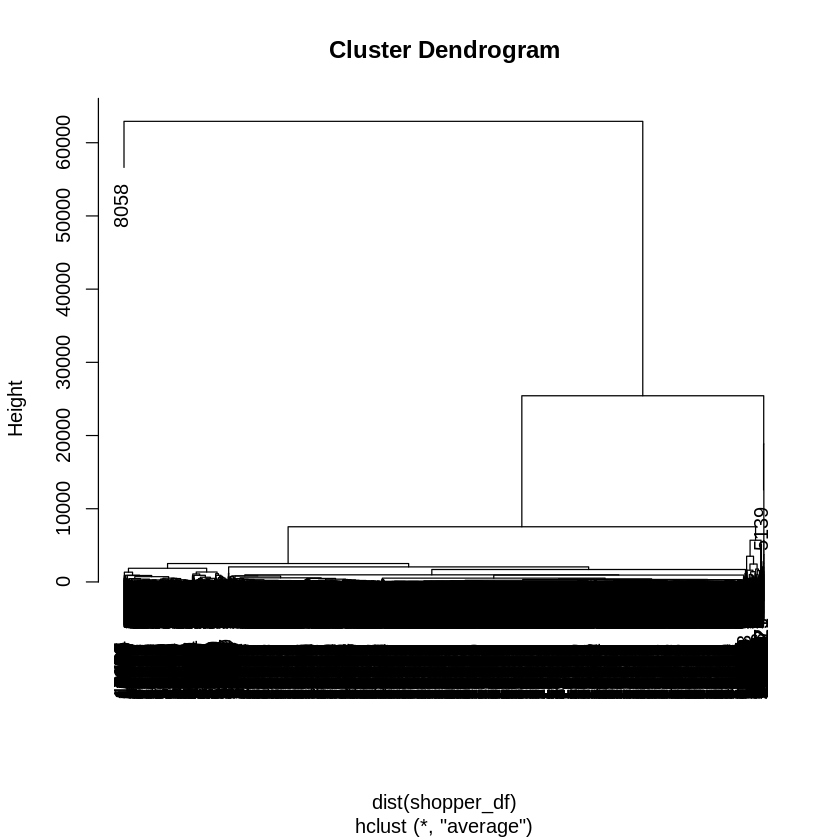

In [0]:
# Using a different linkage method
clusters1 = hclust(dist(shopper_df), method='average')
plot(clusters1)

> Optimum number of clusters is still 2

In [0]:
clustercut1 = cutree(clusters1, 2)
table(clustercut1, shopper$Revenue)

           
clustercut1 FALSE  TRUE
          1 10407  1908
          2     1     0

In [0]:
install.packages("Rtsne")
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


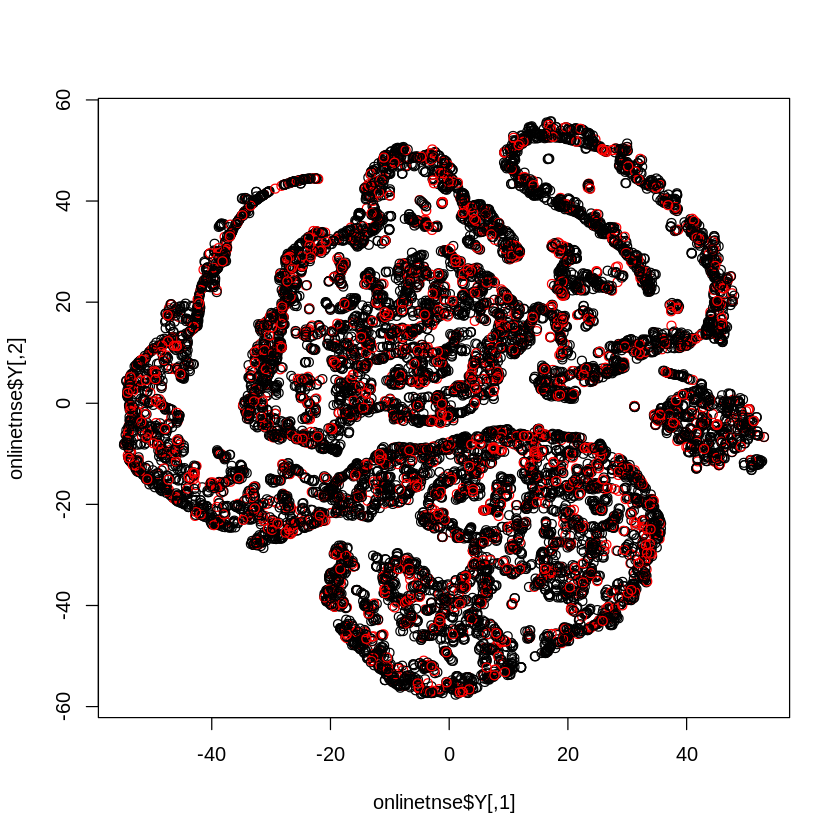

In [0]:
# Using the Rtnse function
# Removing any duplicated entrie in the dataset

ushopper = unique(shopper[, 1:18])
onlinetnse = Rtsne(ushopper[, 1:17], epoch=1000)
plot(onlinetnse$Y, col= shopper$Revenue)

In [0]:
head(shopper)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
